In [1]:
# Dependencies
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mousedrug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)
clinicaltrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
mousedrug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# Merge data 
merged_df = pd.merge(clinicaltrial_df, mousedrug_df, on=('Mouse ID'))
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
tumor_vol_df = merged_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [5]:
mean_sem_tv = tumor_vol_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
mean_sem_tv.head()

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [6]:
cap_tvmean_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_tvmean_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_tvmean_list = mean_sem_tv.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_tvmean_list = mean_sem_tv.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

In [7]:
cap_tvsem_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
inf_tvsem_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ket_tvsem_list = mean_sem_tv.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
plc_tvsem_list = mean_sem_tv.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

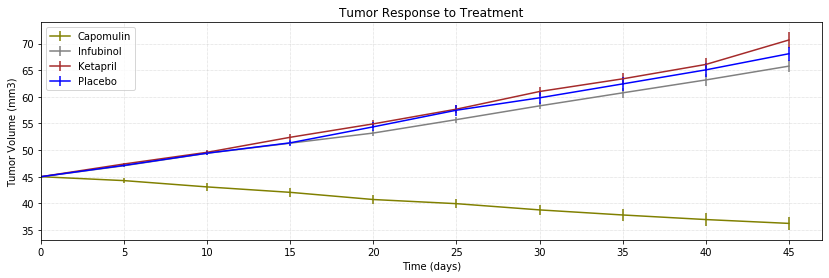

In [9]:
fig = plt.figure(figsize=(14, 4))

ax = plt.subplot(111)


x_axis = np.arange(0, 50, 5)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


ax.errorbar(x_axis, cap_tvmean_list, yerr=cap_tvsem_list, fmt="olive",
                   label="Capomulin")
ax.errorbar(x_axis, inf_tvmean_list, yerr=inf_tvsem_list, fmt="gray",
                   label="Infubinol")
ax.errorbar(x_axis, ket_tvmean_list, yerr=ket_tvsem_list, fmt="brown",
                   label="Ketapril")
ax.errorbar(x_axis, plc_tvmean_list, yerr=plc_tvsem_list, fmt="blue",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        

plt.show()
fig.savefig("Images/Tumor_Response_to_Treatment.png")

In [10]:

meta_sites_df = merged_df.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [11]:
mean_sem_meta = meta_sites_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [12]:
cap_mtmean_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
inf_mtmean_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ket_mtmean_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
plc_mtmean_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [13]:
cap_mtsem_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
inf_mtsem_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ket_mtsem_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
plc_mtsem_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

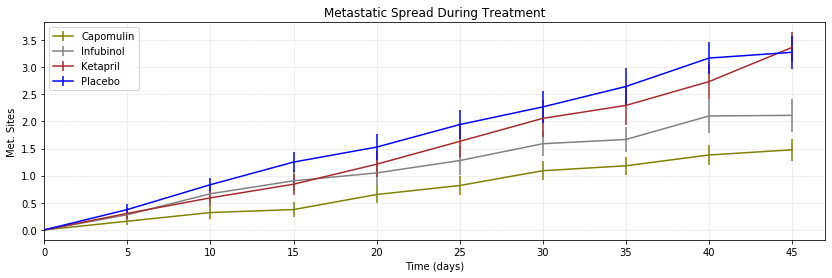

In [14]:
fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(111)

x_axis = np.arange(0, 50, 5)


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")

ax.errorbar(x_axis, cap_mtmean_list, yerr=cap_mtsem_list, fmt="olive",
                   label="Capomulin")
ax.errorbar(x_axis, inf_mtmean_list, yerr=inf_mtsem_list, fmt="gray",
                   label="Infubinol")
ax.errorbar(x_axis, ket_mtmean_list, yerr=ket_mtsem_list, fmt="brown",
                   label="Ketapril")
ax.errorbar(x_axis, plc_mtmean_list, yerr=plc_mtsem_list, fmt="blue",
                   label="Placebo")


ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        

plt.show()
fig.savefig("Images/Metastatic_Spread_treatment.png")

In [15]:
mouse_count = merged_df.groupby(['Drug', 'Timepoint'])['Timepoint'].count()
mouse_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [16]:
cap_surv_list = mouse_count.loc['Capomulin'].tolist()
inf_surv_list = mouse_count.loc['Infubinol'].tolist()
ket_surv_list = mouse_count.loc['Ketapril'].tolist()
plc_surv_list = mouse_count.loc['Placebo'].tolist()

In [17]:
cap_survrate = [(x/cap_surv_list[0])*100 for x in cap_surv_list]
inf_survrate = [(x/inf_surv_list[0])*100 for x in inf_surv_list]
ket_survrate = [(x/ket_surv_list[0])*100 for x in ket_surv_list]
plc_survrate = [(x/plc_surv_list[0])*100 for x in plc_surv_list]

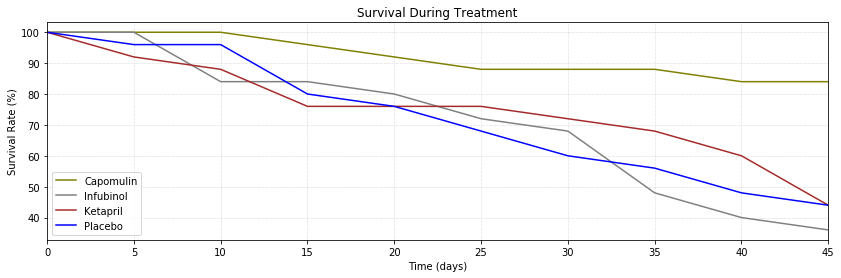

In [18]:
fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(111)

x_axis = np.arange(0, 50, 5)

plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")


ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
ax.plot(x_axis, inf_survrate, color="gray", label="Infubinol")
ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, plc_survrate, color="blue", label="Placebo")


ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis))
        

plt.show()
fig.savefig("Images/Survival_Treatment.png")

In [19]:
# compares the total % tumor volume change for each drug across the full 45 days.
cap_tv_change = int(((cap_tvmean_list[-1] - cap_tvmean_list[0])/cap_tvmean_list[0])*100)
inf_tv_change = int(((inf_tvmean_list[-1] - inf_tvmean_list[0])/inf_tvmean_list[0])*100)
ket_tv_change = int(((ket_tvmean_list[-1] - ket_tvmean_list[0])/ket_tvmean_list[0])*100)
plc_tv_change = int(((plc_tvmean_list[-1] - plc_tvmean_list[0])/plc_tvmean_list[0])*100)

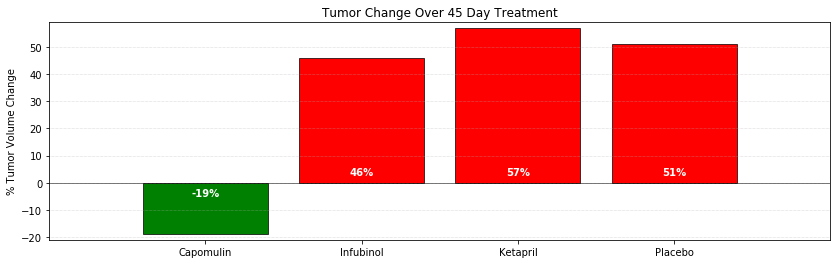

In [20]:
fig = plt.figure(figsize=(14, 4))
y = [cap_tv_change, inf_tv_change, ket_tv_change, plc_tv_change]

x_axis = np.arange(len(y))


colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')


tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])


plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)


plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)


plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)


def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_growth_bar)


plt.show()
fig.savefig("Images/Tumor_Change_Treatment.png")